# STUDENT PERFORMANCE INDICATOR

Life cycle of this Machine learning Project is as follows :
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

# Problem Statement

- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

- Data Source -  https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

## PART 1 : Importing Project Requirements and data exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

Importing CSV file into a Data Frame

In [7]:
df = pd.read_csv("study_performance (1).csv")

Checking top 5 records in the dataframe

In [8]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Information of the Dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Shape of the Dataset

In [14]:
df.shape

(1000, 8)

### Data Information
- gender : Sex of students(M/F)
- race/ethnicity : ethnicity of students(A,B,C,D,E)
- parental level of education :  parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch :having lunch before test (standard or free/reduced)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## PART 2 : Data checks and cleaning
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

#### 2.1 Check missing Values

In [18]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in our data sets

#### 2.2 Check Duplicate values

In [20]:
df.duplicated().sum()

0

There are Zero duplicate values in this data set

#### 2.3 Check data types

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


5 of the feilds are of object data type and 3 are Numerical feilds in the data set

#### 2.4 Check for number of Unique values in each feild/columns

In [23]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 2. 5 Statistical check on the data set

In [24]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight 
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading yet higher = 17

### EXPLOTARY DATA ANALYSIS

In [25]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [28]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

#printing Numerical and Categorical column values
print('Numerical Columns : {0}'.format(numeric_features))
print('Categorical Columns : {0}'.format(categorical_features))

Numerical Columns : ['math_score', 'reading_score', 'writing_score']
Categorical Columns : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


#### 2.6 Total and Average values

In [33]:
df['Total_score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Avg_score']= round(df['Total_score']/len(numeric_features),2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [41]:
reading_full =  df[df['math_score'] == 100]['Avg_score'].count()
writing_full = df[df['writing_score'] == 100]['Avg_score'].count()
math_full = df[df['math_score'] == 100]['Avg_score'].count()

In [42]:
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 7


In [44]:
reading_less_20 = df[df['reading_score'] <= 20]['Avg_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Avg_score'].count()
math_less_20 = df[df['math_score'] <= 20]['Avg_score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#### Insights

- From above values we get students have performed the worst in Maths followed by writing and reading accordingly.
- Best performance is in reading section.

## Part 3 : Visualization


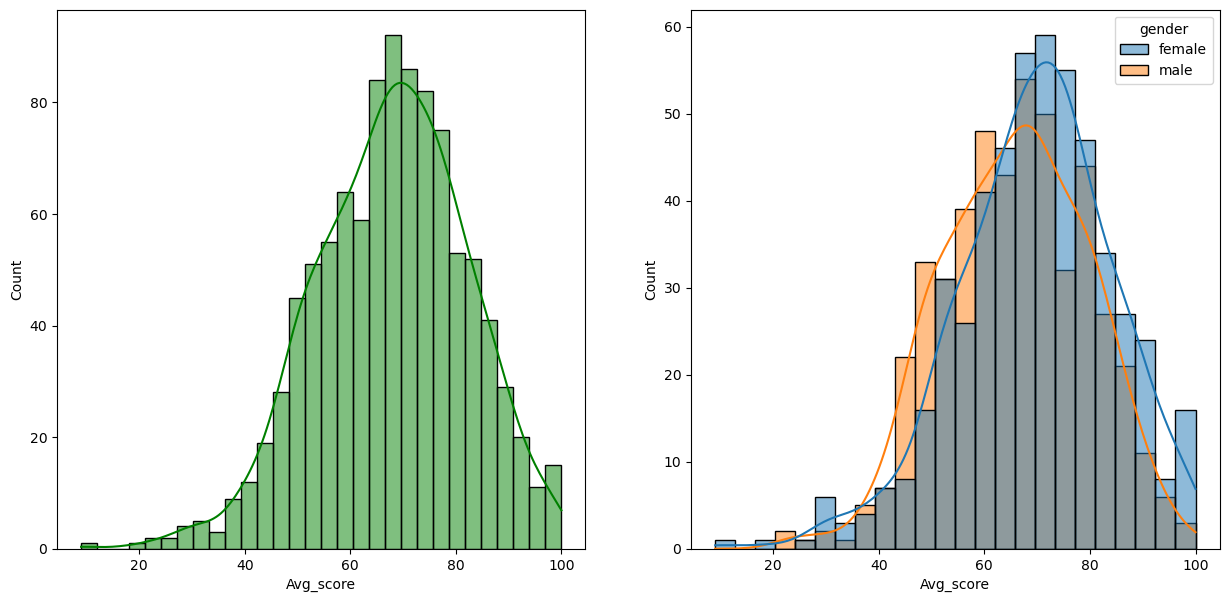

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Avg_score',kde=True,hue='gender')
plt.show()

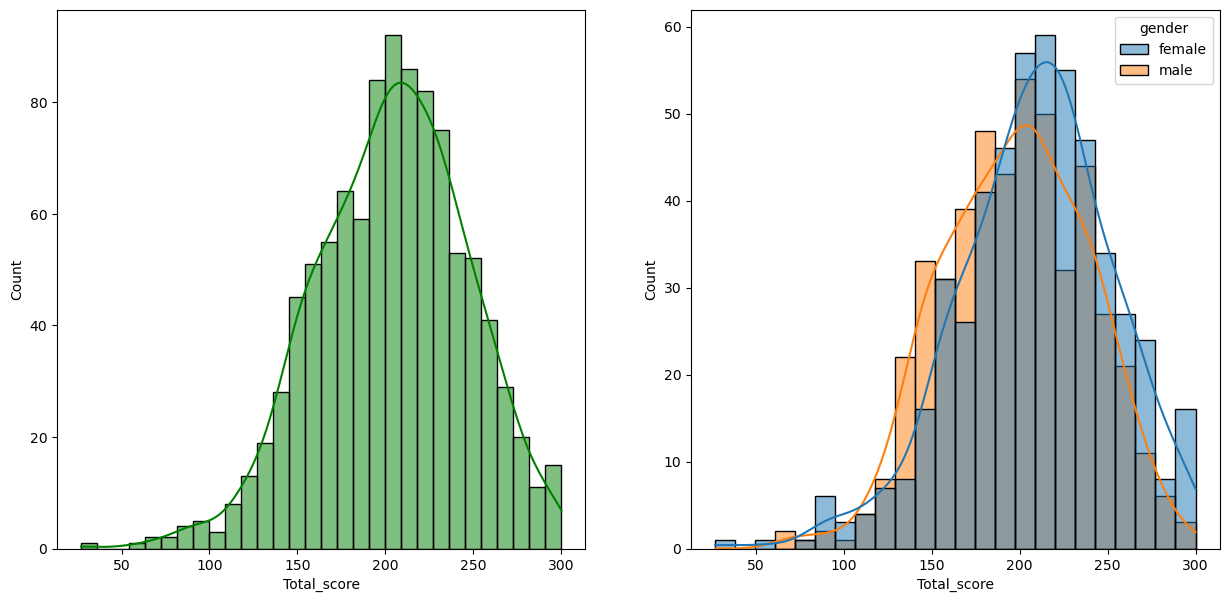

In [60]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Totalscore',kde=True,hue='gender')
plt.show()

- Average score of female is higher than male students
- Female students performed much better the male students



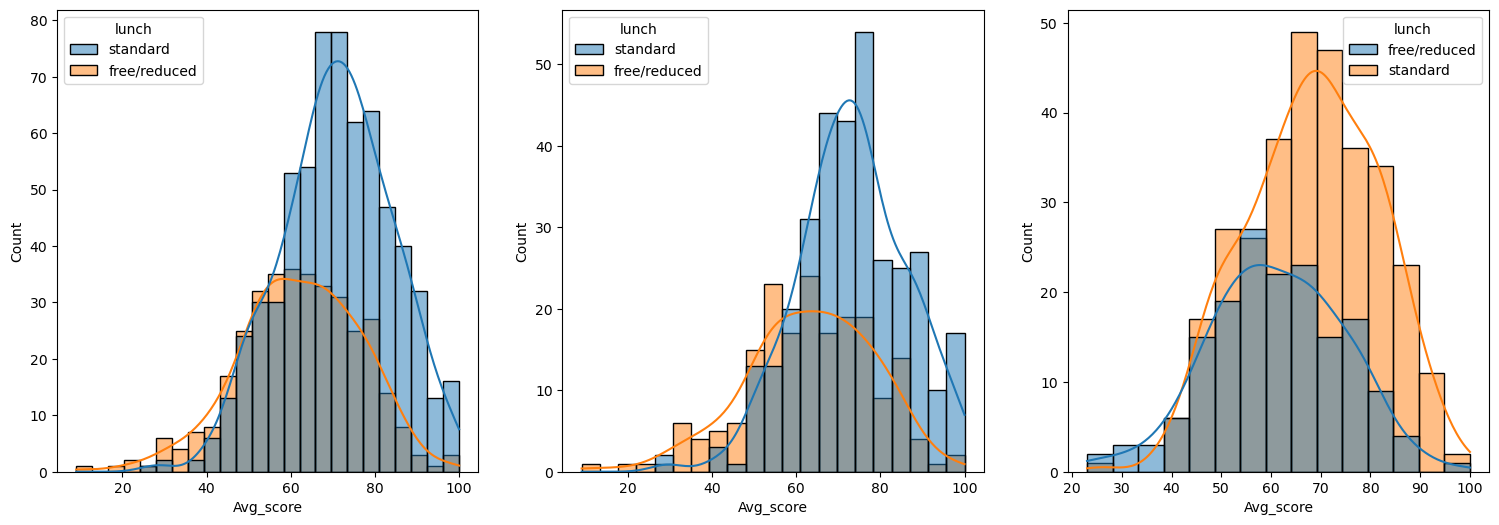

In [63]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Avg_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Avg_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Avg_score',kde=True,hue='lunch')
plt.show()

### Insights

- Students with standard lunchs performed better than students with free lunch
- The above observation is true for all cases

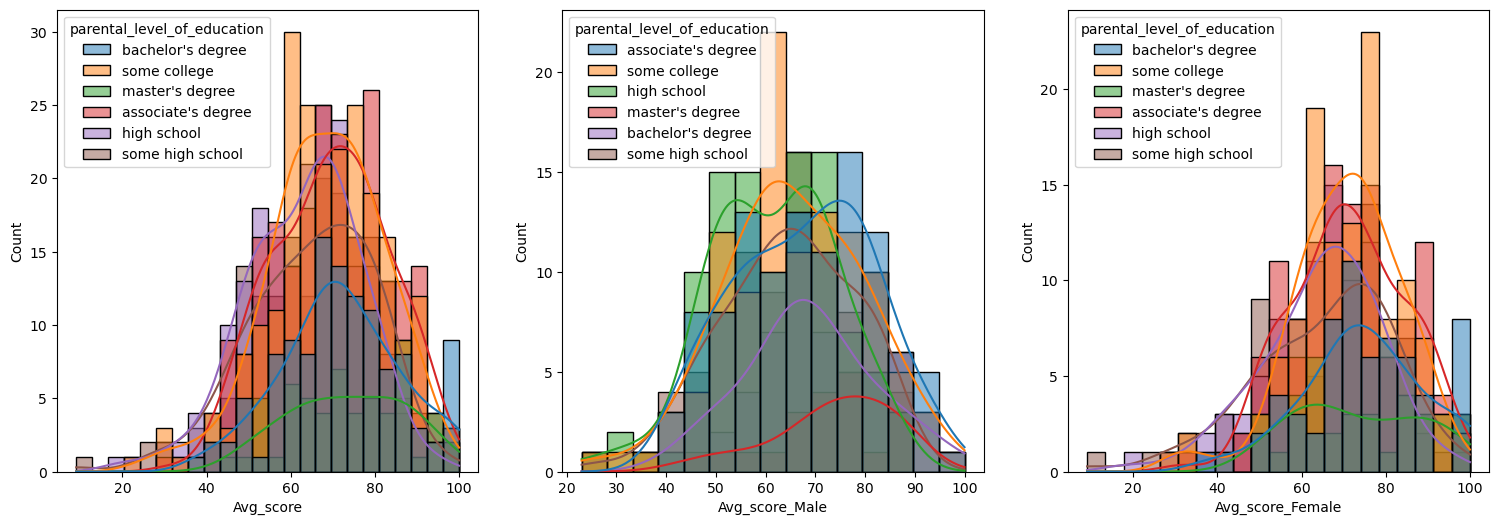

In [70]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Avg_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg_score',kde=True,hue='parental_level_of_education')
plt.xlabel('Avg_score_Male')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg_score',kde=True,hue='parental_level_of_education')
plt.xlabel('Avg_score_Female')
plt.show()

#### Insight

- Overall the level of parent's education doesn't have much effect on their children's grade.
- Children who's parents are having masters degree and are Male tend to perform better.
- Children of parents with masters degree tends to score higher then the rest of students.

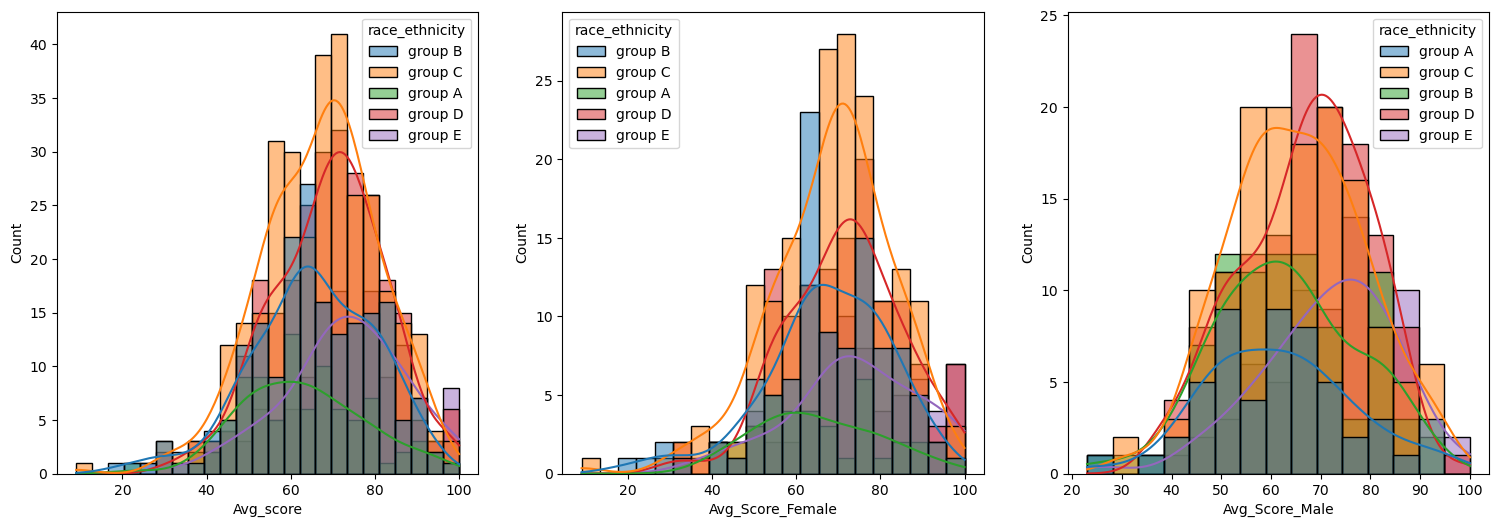

In [75]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Avg_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Avg_score',kde=True,hue='race_ethnicity')
plt.xlabel('Avg_Score_Female')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Avg_score',kde=True,hue='race_ethnicity')
plt.xlabel('Avg_Score_Male')
plt.show()

#### Insight

- Student from ethnic group A and B tends to perform poorly as compared to other ethnicities. 

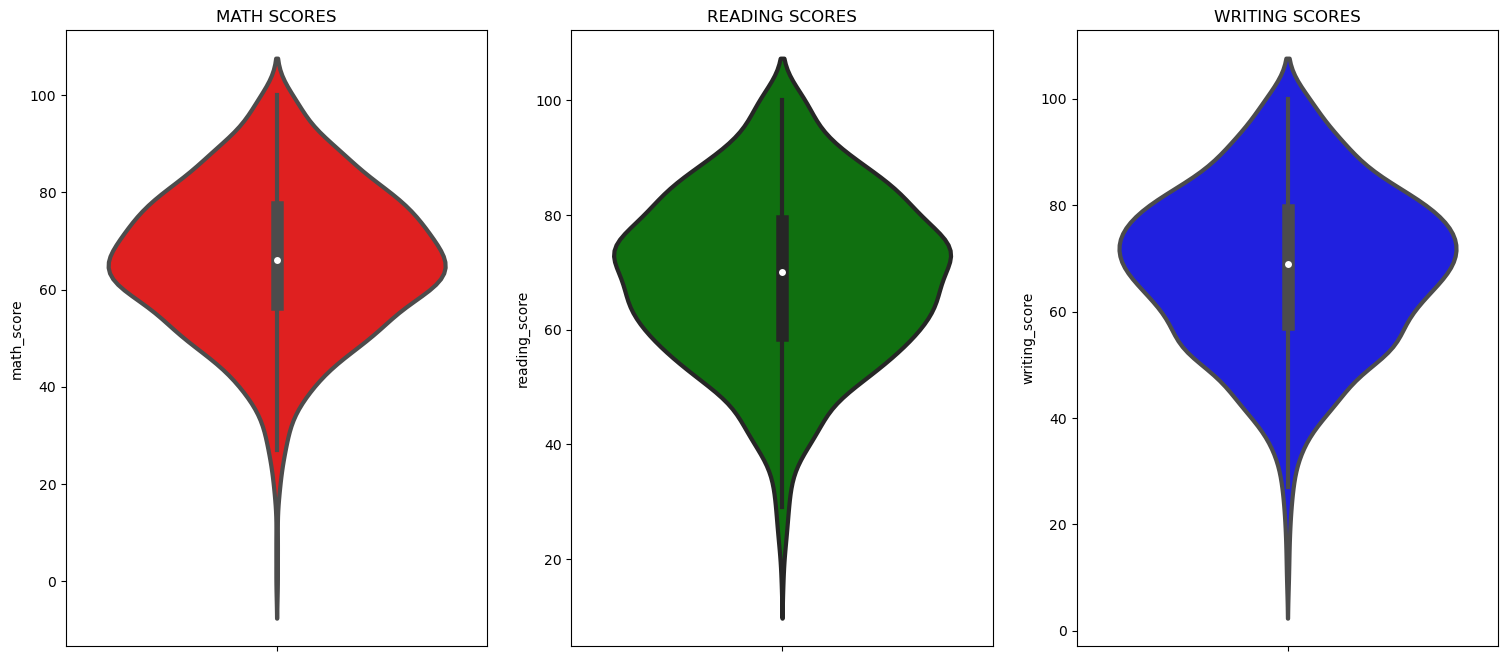

In [77]:
plt.figure(figsize=(25,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Insight

- Most Students scored between 50 to 80 Marks in all the three subjects

### Data Distribution 

- Is our Data balanced or imbalanced?
- What is the Percentage of Male and Female studens in our datasets?

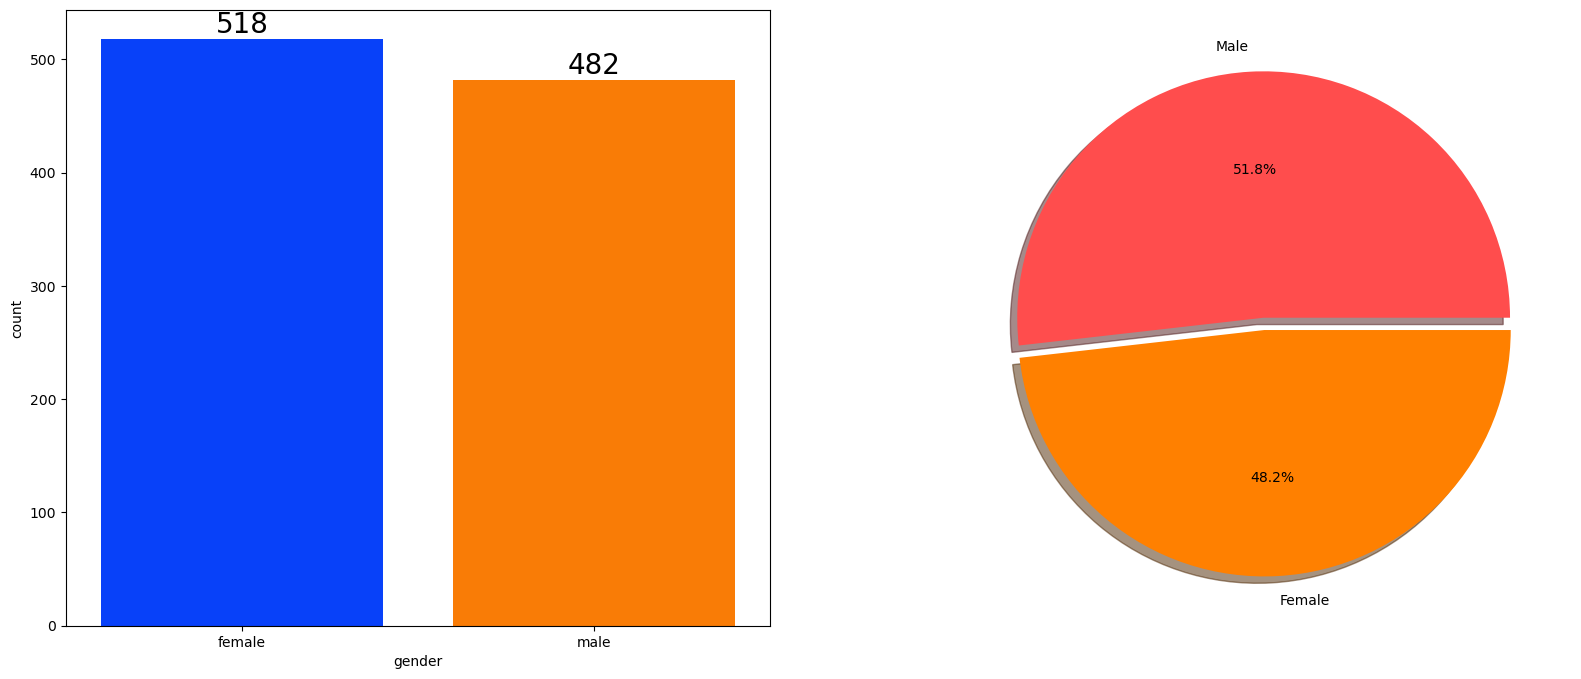

In [86]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.05],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insight

- Our data is balanced with 51.8% Male students and 48.2% Female students.
- The count of Male student is 518 and Female student is 482.

### Data Distribution based on various Feilds in Data

We will create pie charts to visualize the percentage distribution of our data set

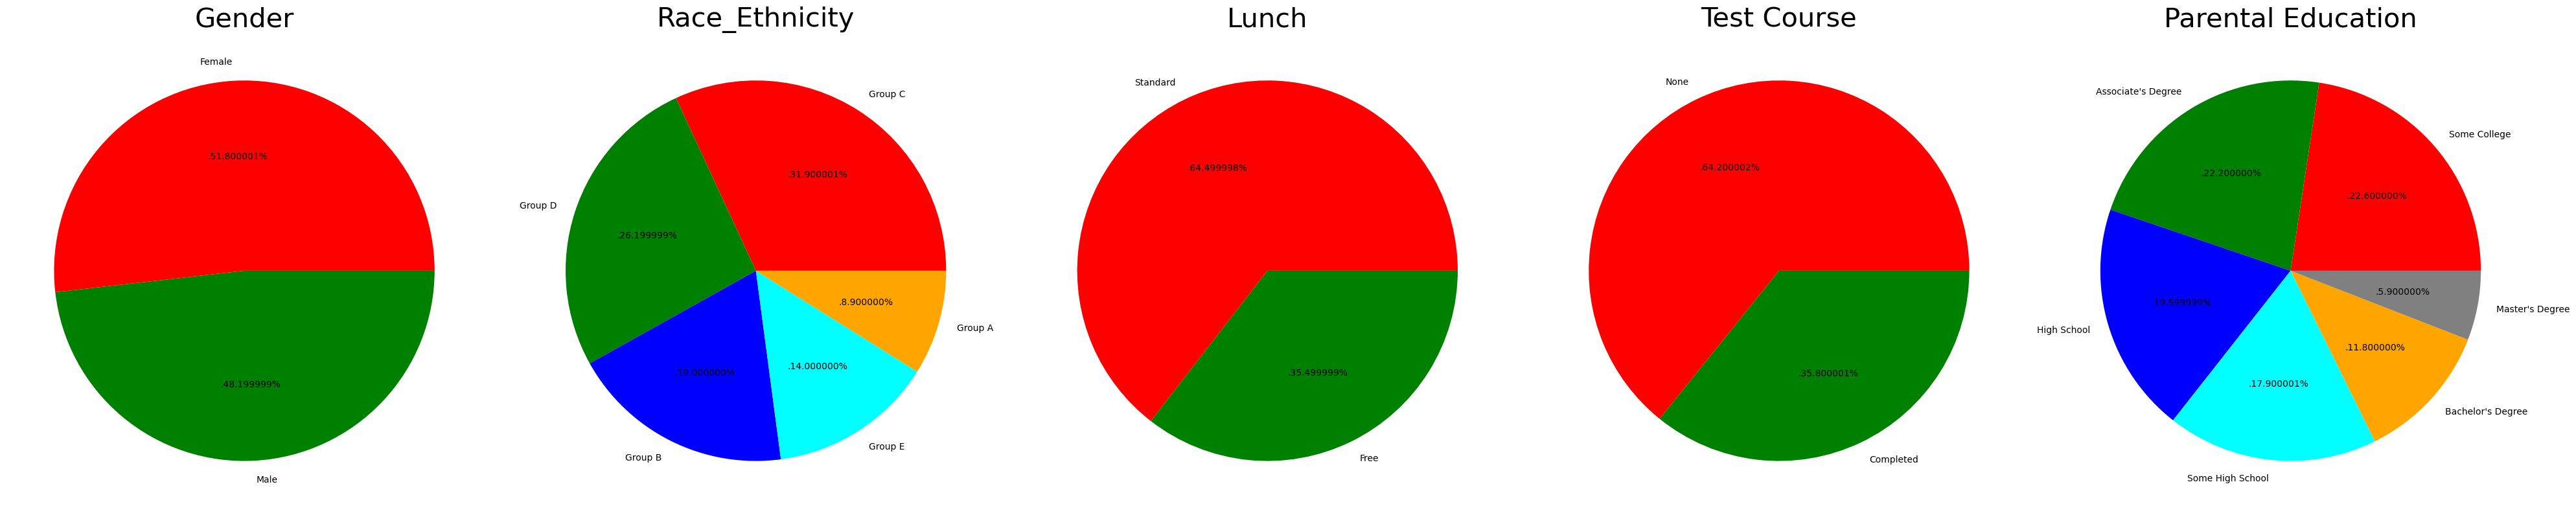

In [99]:
plt.rcParams['figure.figsize'] = (40, 12)

plt.subplot(1, 5, 1)
size = round(df['gender'].value_counts(),2)
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 30)
plt.axis('off')



plt.subplot(1, 5, 2)
size = round(df['race_ethnicity'].value_counts()*100,2)
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 30)
plt.axis('off')



plt.subplot(1, 5, 3)
size = round(df['lunch'].value_counts(),2)
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 30)
plt.axis('off')


plt.subplot(1, 5, 4)
size = round(df['test_preparation_course'].value_counts(),2)
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 30)
plt.axis('off')


plt.subplot(1, 5, 5)
size = round(df['parental_level_of_education'].value_counts(),2)
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#### Impact of Ethnicity on grades

We perform a Bivariate analysis between Race/Ethnicity and Student performance to check any relationship between them

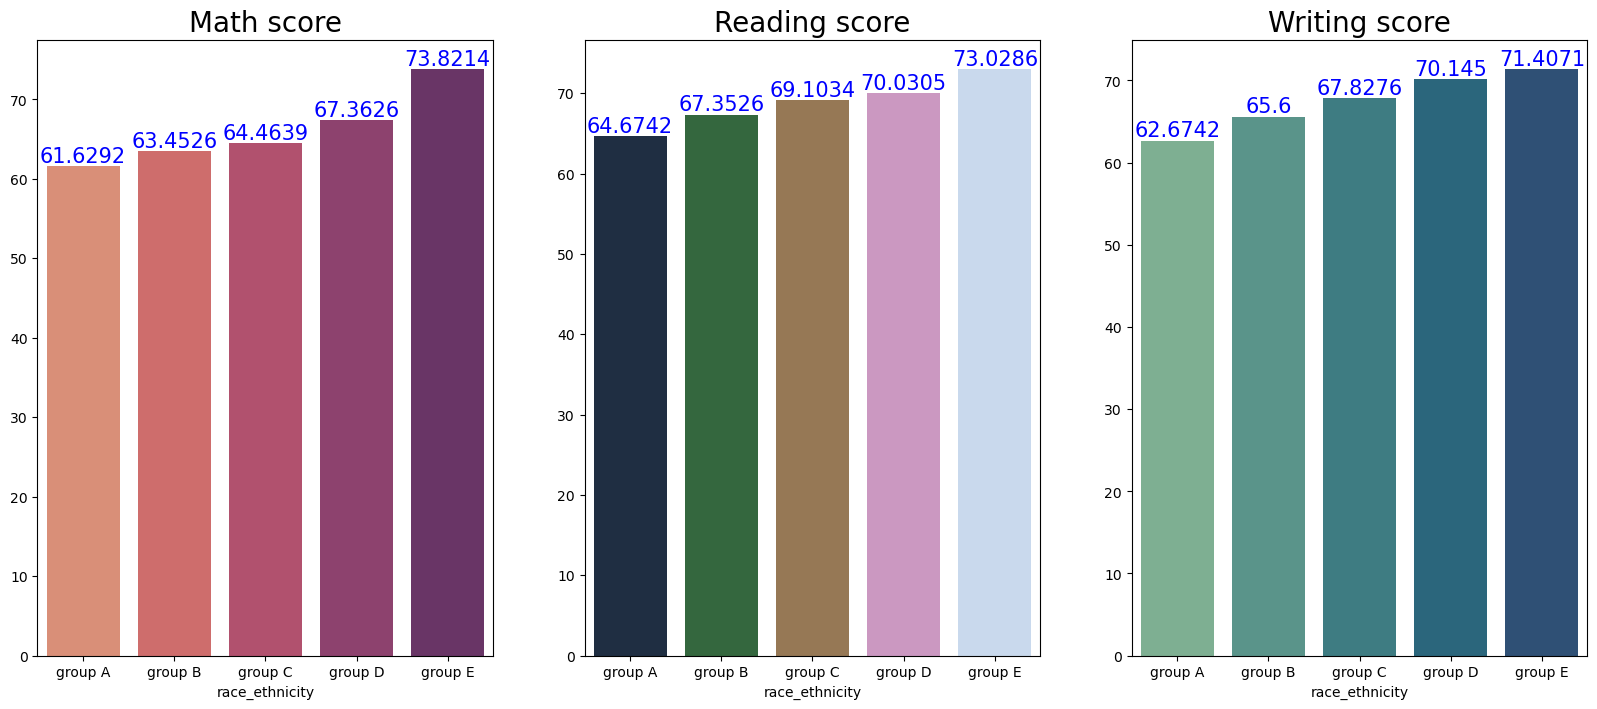

In [116]:
Group_data_re=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data_re['math_score'].mean().index,y=Group_data_re['math_score'].mean().values,palette = 'flare',ax=ax[0])
ax[0].set_title('Math score',color='BLACK',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='blue',size=15)

sns.barplot(x=Group_data_re['reading_score'].mean().index,y=Group_data_re['reading_score'].mean().values,palette = 'cubehelix',ax=ax[1])
ax[1].set_title('Reading score',color='BLACK',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='blue',size=15)

sns.barplot(x=Group_data_re['writing_score'].mean().index,y=Group_data_re['writing_score'].mean().values,palette = 'crest',ax=ax[2])
ax[2].set_title('Writing score',color='BLACK',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='blue',size=15)

#### Insight

- Students from Group D and Group E performed best in all the 3 test.
- Students from Group A performed lowest amoung all the race/Ethnicity.

### Impact of Test Prepration on Students Grade

<Axes: xlabel='lunch', ylabel='writing_score'>

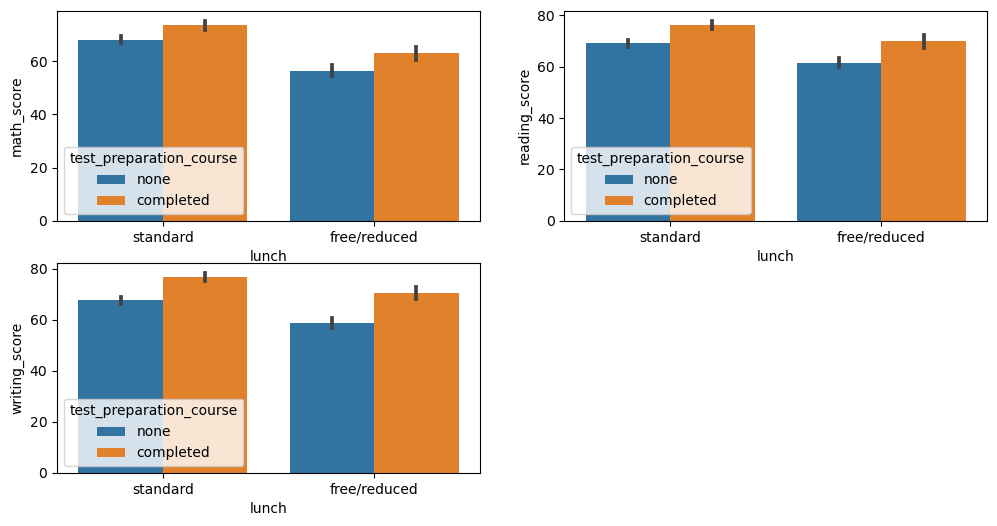

In [110]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

<Axes: xlabel='gender', ylabel='writing_score'>

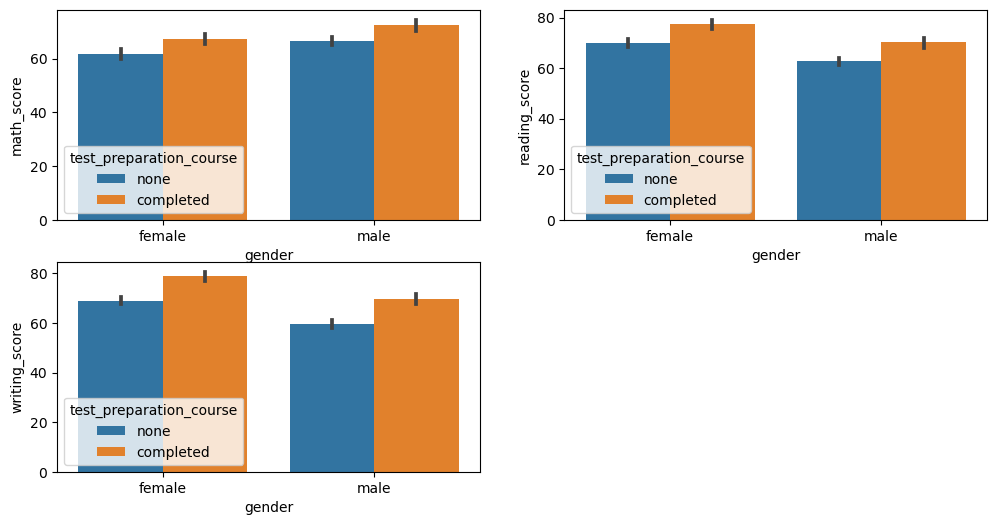

In [111]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['gender'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['gender'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['gender'], y=df['writing_score'], hue=df['test_preparation_course'])

<Axes: xlabel='Avg_score', ylabel='Count'>

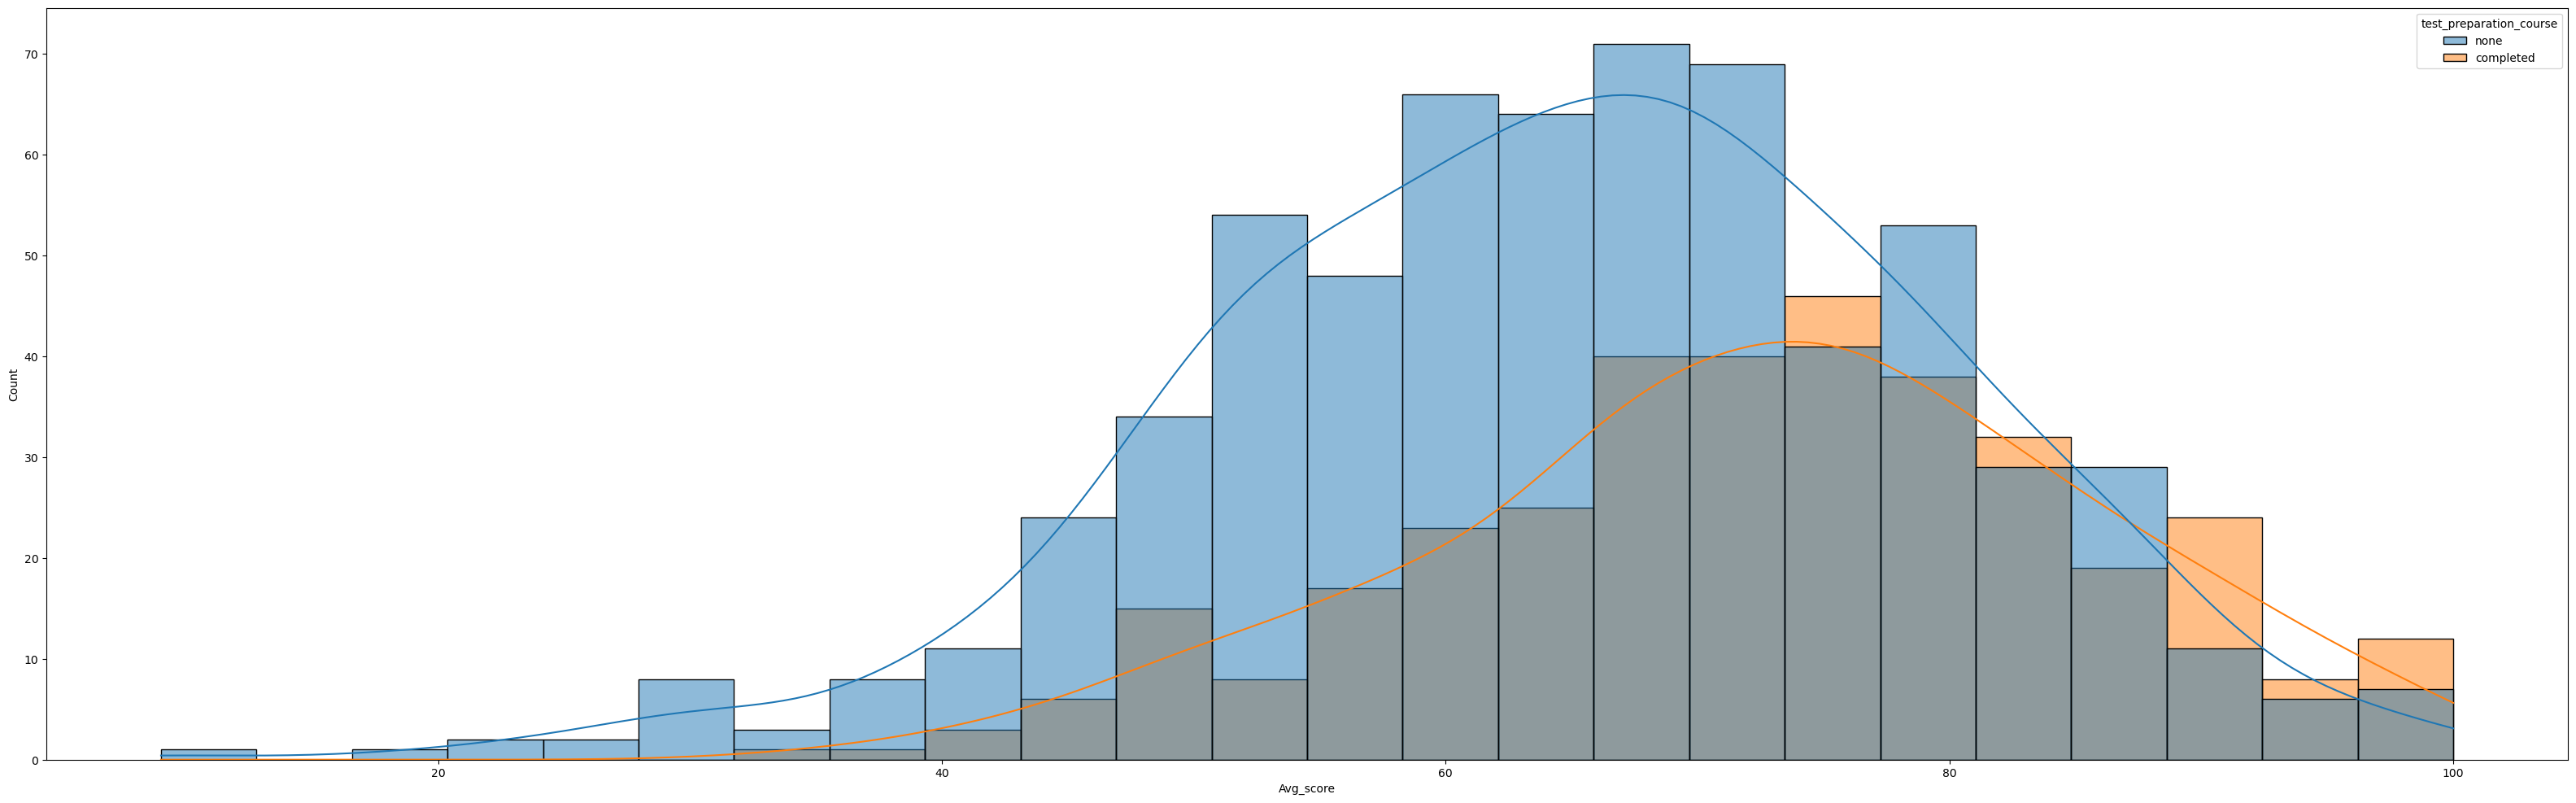

In [113]:
sns.histplot(data=df,x='Avg_score',kde=True,hue='test_preparation_course')

#### Insight

- Student who have completed test prep course Scored higher marks as compared to student who did not completed the course.
- it is true for both genders.
- Students who has standard lunch and have completed test prepration course scored higher as compared to students with free lunch.


### Pair plot between all the Feilds

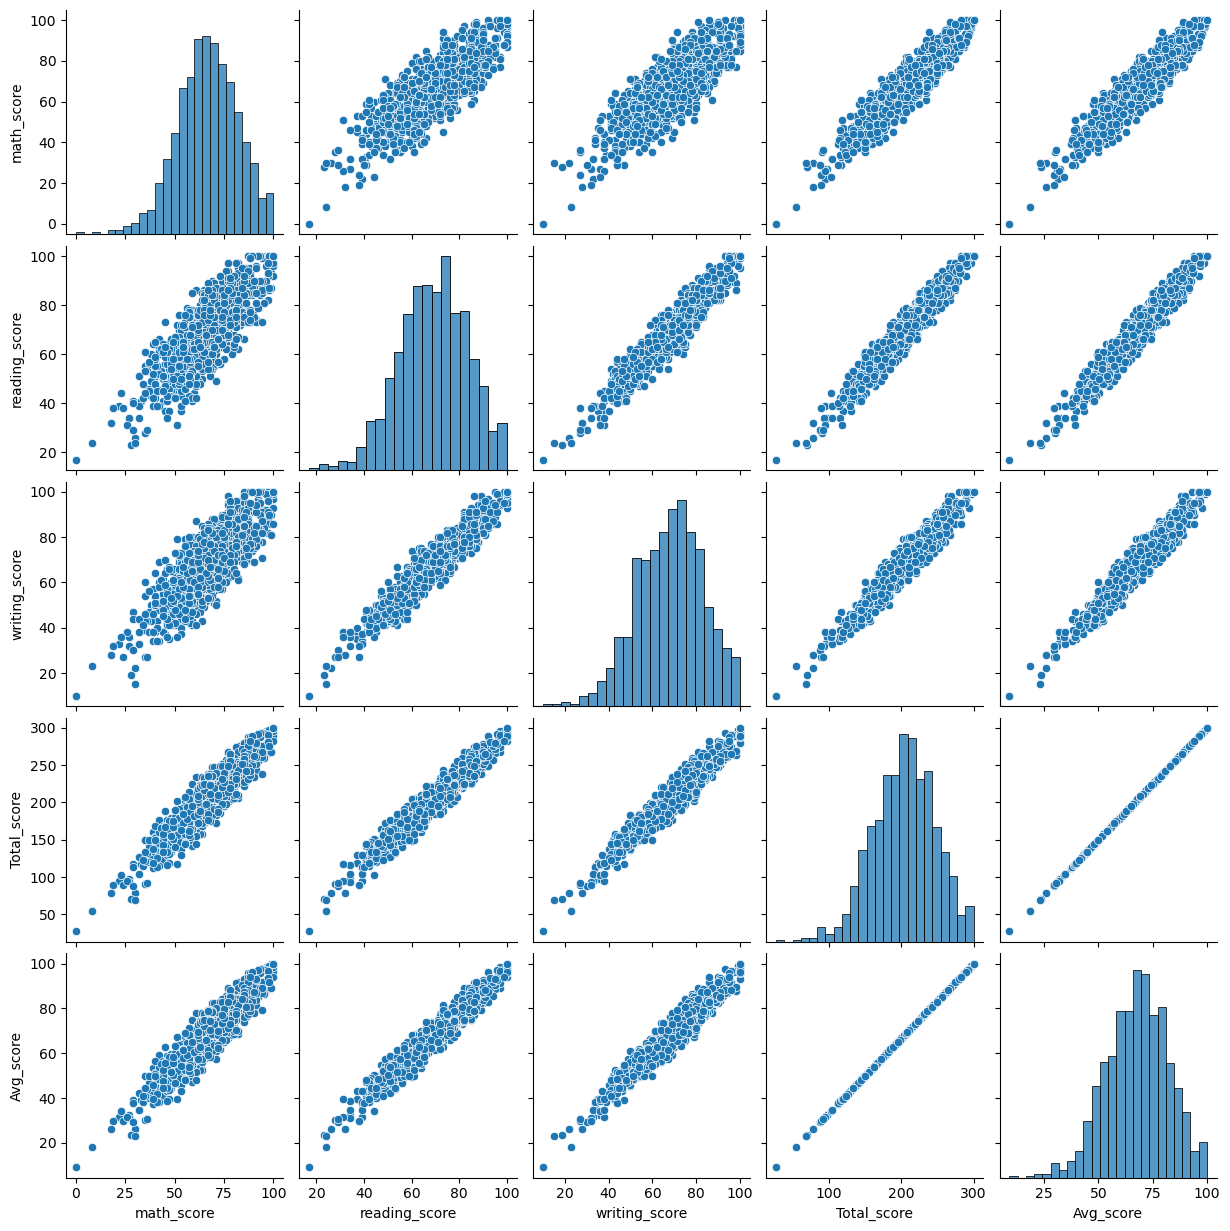

In [112]:
sns.pairplot(data=df)

#### Insight

- The relationship between all the variables is linear

# Conclusion 
- Students with Test prepration course tends to perform better.
- Females performed relatively better as comapared to Males.
- Students with parents having Master's degree have higher average scores.
- Student having standard lunch performed better than students having free lunch.
